<a href="https://colab.research.google.com/github/atlas-github/20190731StarMediaGroup/blob/master/correlation_historical_weather_with_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Make API call for one specific coordinate

Source of weather data can be found at [Open-Meteo](https://open-meteo.com/en/docs/historical-weather-api). No payment needed.

Notice the latitude, longitude, start date, end date, weather data types, and timezone settings in the URL below.

The coordinate below is for the branch at Suria KLCC.

In [1]:
import requests
import pandas as pd

# API URL
url = "https://archive-api.open-meteo.com/v1/archive"

# Query parameters
params = {
    "latitude": 3.158003670011451,
    "longitude": 101.71223105634625,
    "start_date": "2023-01-01",
    "end_date": "2023-05-31",
    "hourly": "temperature_2m,precipitation,rain",
    "timezone": "Asia/Singapore"
}

# Send GET request to API
response = requests.get(url, params=params)
response

<Response [200]>

Alternative data source is {OpenWeather](https://openweathermap.org/price), but requires sign in. Free quota is 1,000 API calls daily, and the price for exceeding the free quota is 0.0012 GBP per API call over the daily limit.

Converting the json object above into a table gives is the following result:

In [2]:
# Check if the request was successful
if response.status_code == 200:
    # Parse JSON response
    data = response.json()

    # Extract relevant data from the response
    time_list = data["hourly"]["time"]
    temperature_list = data["hourly"]["temperature_2m"]
    precipitation_list = data["hourly"]["precipitation"]
    rain_list = data["hourly"]["rain"]

    # Create a DataFrame
    df = pd.DataFrame({
        "Time": time_list,
        "Temperature (°C)": temperature_list,
        "Precipitation (mm)": precipitation_list,
        "Rain (mm)": rain_list
    })

    # Display the DataFrame
    df
else:
    print("Error:", response.status_code)

In [3]:
df

,Time,Temperature (°C),Precipitation (mm),Rain (mm)
0,2023-01-01T00:00,23.7,0.0,0.0
1,2023-01-01T01:00,23.1,0.0,0.0
2,2023-01-01T02:00,22.6,0.0,0.0
3,2023-01-01T03:00,22.4,0.0,0.0
4,2023-01-01T04:00,22.4,0.0,0.0
...,...,...,...,...
3619,2023-05-31T19:00,29.3,0.0,0.0
3620,2023-05-31T20:00,27.9,0.0,0.0
3621,2023-05-31T21:00,27.4,0.0,0.0
3622,2023-05-31T22:00,27.3,0.0,0.0


Classify rain level

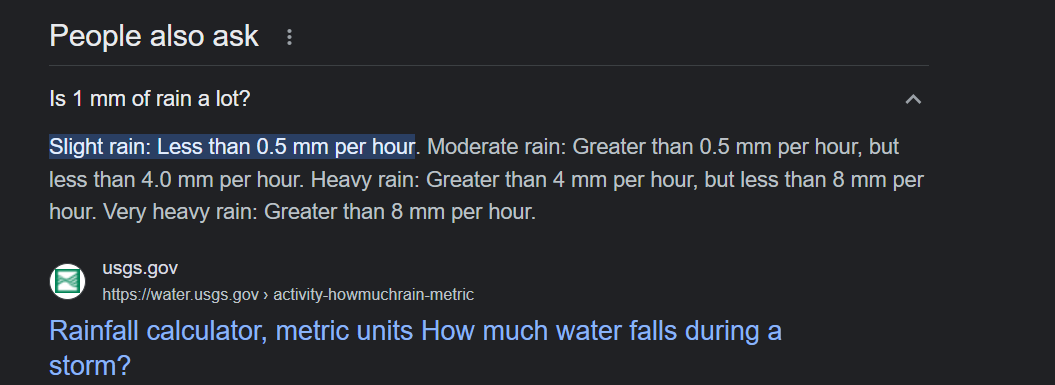

In [6]:
#define rain function

def rain(x):
  if x < 0.5:
    return "Slight rain"
  if (x >= 0.5 and x < 4.0):
    return "Moderate rain"
  if (x >= 4.0 and x < 8.0):
    return "Heavy rain"
  if x >= 8.0:
    return "Very heavy rain"

In [9]:
#applying the filter function to 'Salary' column

df['Classification'] = df['Precipitation (mm)'].apply(rain)

In [10]:
df

,Time,Temperature (°C),Precipitation (mm),Rain (mm),Classification
0,2023-01-01T00:00,23.7,0.0,0.0,Slight rain
1,2023-01-01T01:00,23.1,0.0,0.0,Slight rain
2,2023-01-01T02:00,22.6,0.0,0.0,Slight rain
3,2023-01-01T03:00,22.4,0.0,0.0,Slight rain
4,2023-01-01T04:00,22.4,0.0,0.0,Slight rain
...,...,...,...,...,...
3619,2023-05-31T19:00,29.3,0.0,0.0,Slight rain
3620,2023-05-31T20:00,27.9,0.0,0.0,Slight rain
3621,2023-05-31T21:00,27.4,0.0,0.0,Slight rain
3622,2023-05-31T22:00,27.3,0.0,0.0,Slight rain


To download the table into a csv format, run the code below:

In [11]:
df.to_csv("klcc.csv")

from google.colab import files
files.download("klcc.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>